In [ ]:
import math

def euc_dist(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def calc_mean(cluster):
    return [sum(coord) / len(coord) for coord in zip(*cluster)]

def kmeans(X, initial_centroids, k=2, max_iterations=100, threshold=1e-4):
    centroids = initial_centroids
    for iteration in range(max_iterations):
        clusters = {i: [] for i in range(k)}

        for point in X:
            distances = [euc_dist(point, centroid) for centroid in centroids]
            nearest_centroid = distances.index(min(distances))
            clusters[nearest_centroid].append(point)

        new_centroids = []
        for i in range(k):
            if clusters[i]:
                new_centroids.append(calc_mean(clusters[i]))
            else:
                new_centroids.append(centroids[i])

        centroid_shifts = [euc_dist(new_centroids[i], centroids[i]) for i in range(k)]
        if max(centroid_shifts) < threshold:
            break

        centroids = new_centroids

    return centroids, clusters

X = [
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3], [6.1, 2.8],
    [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5],
    [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1], [4.0, 0.0],
    [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
]

init_centroids = [[3.0, 3.0], [2.0, 2.0]]

fincs, clusters = kmeans(X, init_centroids)

print("Centroids at the end:")
for i, centroid in enumerate(fincs):
    print(f"Centroid {i + 1}: {centroid}")

print("clustersss:")
for i, cluster in clusters.items():
    print(f"Cluster {i + 1}: {cluster}")


Centroids at the end:
Centroid 1: [5.8, 2.125]
Centroid 2: [4.199999999999999, -0.05555555555555555]
clustersss:
Cluster 1: [[5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [6.1, 0.5], [5.8, 0.6]]
Cluster 2: [[1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1], [4.0, 0.0], [5.4, -0.5], [5.3, 0.3]]


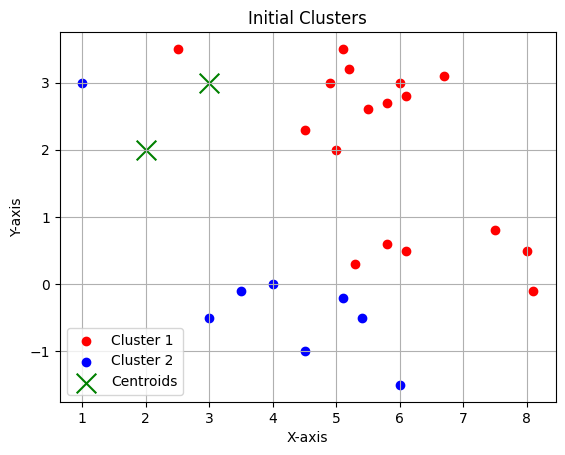

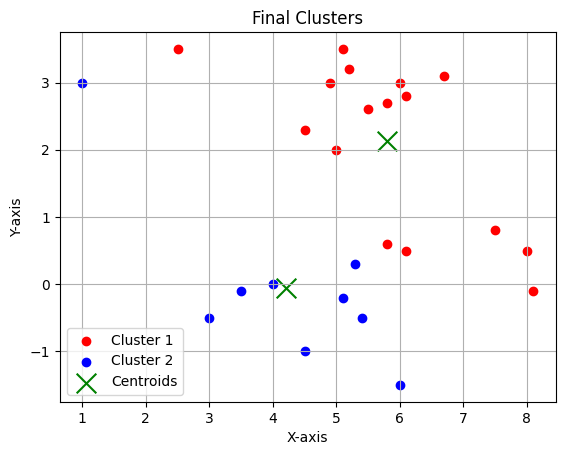

Final Centroids:
Centroid 1: [5.8, 2.125]
Centroid 2: [4.199999999999999, -0.05555555555555555]


In [ ]:
import math
import matplotlib.pyplot as plt

def euc_dist(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def calc_mean(cluster):
    return [sum(coord) / len(coord) for coord in zip(*cluster)]

def kmeans(X, initial_centroids, k=2, max_iterations=100, threshold=1e-4):
    centroids = initial_centroids
    history = [initial_centroids]
    for iteration in range(max_iterations):
        clusters = {i: [] for i in range(k)}

        for point in X:
            distances = [euc_dist(point, centroid) for centroid in centroids]
            nearest_centroid = distances.index(min(distances))
            clusters[nearest_centroid].append(point)

        new_centroids = []
        for i in range(k):
            if clusters[i]:
                new_centroids.append(calc_mean(clusters[i]))
            else:
                new_centroids.append(centroids[i])

        centroid_shifts = [euc_dist(new_centroids[i], centroids[i]) for i in range(k)]
        if max(centroid_shifts) < threshold:
            break

        centroids = new_centroids
        history.append(new_centroids)

    return centroids, clusters, history

def pltclts(X, clusters, centroids, title, filename):
    colors = ['red', 'blue']
    for i, cluster in clusters.items():
        points = list(zip(*cluster))
        plt.scatter(points[0], points[1], color=colors[i], label=f'Cluster {i + 1}')
    centroids_x, centroids_y = zip(*centroids)
    plt.scatter(centroids_x, centroids_y, color='green', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

X = [
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3], [6.1, 2.8],
    [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5],
    [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1], [4.0, 0.0],
    [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
]

init_centroids = [[3.0, 3.0], [2.0, 2.0]]

fincs, clusters, history = kmeans(X, init_centroids)

initial_clusters = {0: [], 1: []}
for point in X:
    distances = [euc_dist(point, centroid) for centroid in init_centroids]
    nearest_centroid = distances.index(min(distances))
    initial_clusters[nearest_centroid].append(point)
pltclts(X, initial_clusters, init_centroids, "Initial Clusters", "initial_clusters.png")

pltclts(X, clusters, fincs, "Final Clusters", "final_clusters.png")

print("Final Centroids:")
for i, centroid in enumerate(fincs):
    print(f"Centroid {i + 1}: {centroid}")


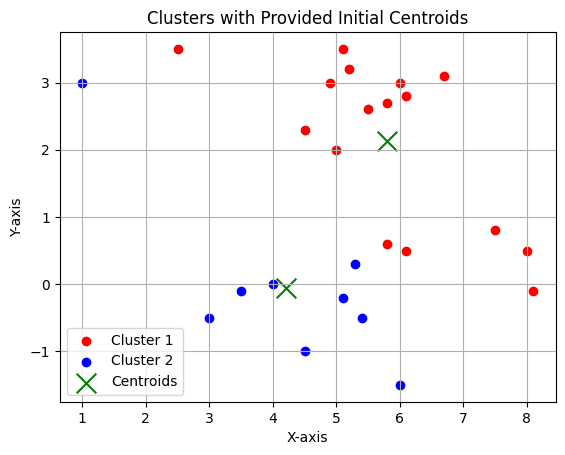

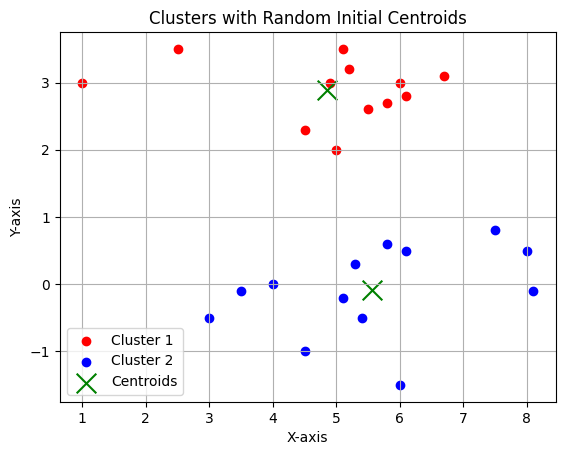

Results with Provided Initial Centroids:
Centroid 1: [5.8, 2.125]
Centroid 2: [4.199999999999999, -0.05555555555555555]

Results with Random Initial Centroids:
Centroid 1: [4.858333333333333, 2.891666666666667]
Centroid 2: [5.561538461538461, -0.09230769230769233]


In [ ]:
import math
import random
import matplotlib.pyplot as plt

# def euc_dist(point1, point2):
#     return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

# def calc_mean(cluster):
#     return [sum(coord) / len(coord) for coord in zip(*cluster)]

def kmeans(X, initial_centroids=None, k=2, max_iterations=100, threshold=1e-4):
    if initial_centroids is None:
        centroids = random.sample(X, k)
    else:
        centroids = initial_centroids

    history = [centroids]
    for iteration in range(max_iterations):
        clusters = {i: [] for i in range(k)}

        for point in X:
            distances = [euc_dist(point, centroid) for centroid in centroids]
            nearest_centroid = distances.index(min(distances))
            clusters[nearest_centroid].append(point)

        new_centroids = []
        for i in range(k):
            if clusters[i]:
                new_centroids.append(calc_mean(clusters[i]))
            else:
                new_centroids.append(centroids[i])

        centroid_shifts = [euc_dist(new_centroids[i], centroids[i]) for i in range(k)]
        if max(centroid_shifts) < threshold:
            break

        centroids = new_centroids
        history.append(new_centroids)

    return centroids, clusters, history

def pltclts(X, clusters, centroids, title, filename):
    colors = ['red', 'blue']
    for i, cluster in clusters.items():
        points = list(zip(*cluster))
        plt.scatter(points[0], points[1], color=colors[i], label=f'Cluster {i + 1}')
    centroids_x, centroids_y = zip(*centroids)
    plt.scatter(centroids_x, centroids_y, color='green', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

X = [
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3], [6.1, 2.8],
    [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5],
    [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1], [4.0, 0.0],
    [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
]

init_centroids = [[3.0, 3.0], [2.0, 2.0]]

provided_centroids, provided_clusters, _ = kmeans(X, init_centroids)
pltclts(X, provided_clusters, provided_centroids, "Clusters with Provided Initial Centroids", "provided_clusters.png")

random_centroids, random_clusters, _ = kmeans(X)
pltclts(X, random_clusters, random_centroids, "Clusters with Random Initial Centroids", "random_clusters.png")

print("Results with Provided Initial Centroids:")
for i, centroid in enumerate(provided_centroids):
    print(f"Centroid {i + 1}: {centroid}")

print("\nResults with Random Initial Centroids:")
for i, centroid in enumerate(random_centroids):
    print(f"Centroid {i + 1}: {centroid}")


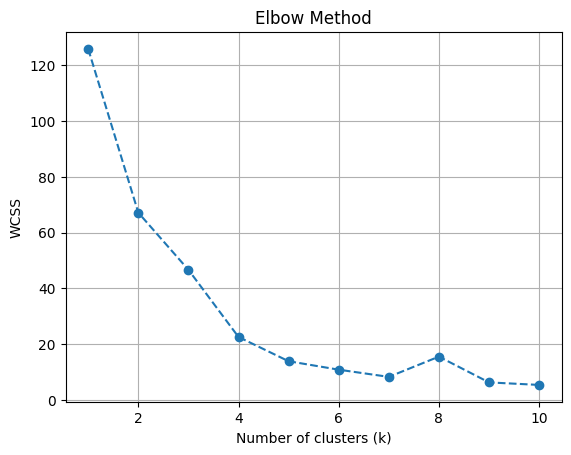

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def euc_dist(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def calc_mean(cluster):
    return [sum(coord) / len(coord) for coord in zip(*cluster)]

def calculate_wcss(clusters, centroids):
    wcss = 0
    for i, cluster in clusters.items():
        for point in cluster:
            wcss += euc_dist(point, centroids[i]) ** 2
    return wcss

def kmeans(X, initial_centroids=None, k=2, max_iterations=100, threshold=1e-4):
    if initial_centroids is None:
        centroids = random.sample(X, k)
    else:
        centroids = initial_centroids

    for iteration in range(max_iterations):
        clusters = {i: [] for i in range(k)}

        for point in X:
            distances = [euc_dist(point, centroid) for centroid in centroids]
            nearest_centroid = distances.index(min(distances))
            clusters[nearest_centroid].append(point)

        new_centroids = []
        for i in range(k):
            if clusters[i]:
                new_centroids.append(calc_mean(clusters[i]))
            else:
                new_centroids.append(centroids[i])

        centroid_shifts = [euc_dist(new_centroids[i], centroids[i]) for i in range(k)]
        if max(centroid_shifts) < threshold:
            break

        centroids = new_centroids

    wcss = calculate_wcss(clusters, centroids)
    return centroids, clusters, wcss

def elbow_method(X, max_k=10):
    wcss_values = []
    for k in range(1, max_k + 1):
        _, _, wcss = kmeans(X, k=k)
        wcss_values.append(wcss)
    return wcss_values

def pltclts(X, clusters, centroids, title, filename):
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'brown']
    for i, cluster in clusters.items():
        points = list(zip(*cluster))
        plt.scatter(points[0], points[1], color=colors[i % len(colors)], label=f'Cluster {i + 1}')
    centroids_x, centroids_y = zip(*centroids)
    plt.scatter(centroids_x, centroids_y, color='black', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

X = [
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3], [6.1, 2.8],
    [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5],
    [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1], [4.0, 0.0],
    [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
]

max_k = 10
wcss_values = elbow_method(X, max_k=max_k)

plt.figure()
plt.plot(range(1, max_k + 1), wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig("elbow_method.png")
plt.show()


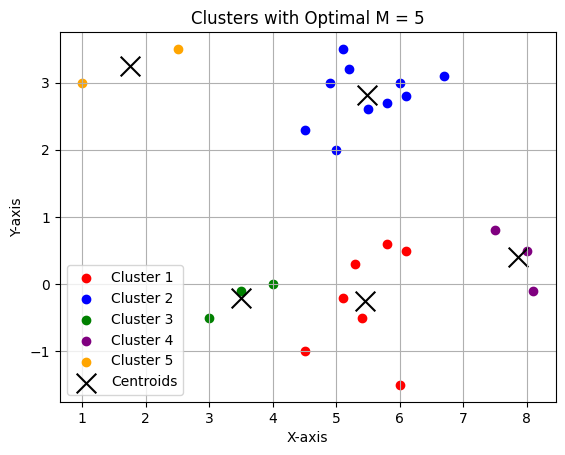

Final Centroids with Optimal Clusters:
Centroid 1: [5.457142857142856, -0.2571428571428572]
Centroid 2: [5.48, 2.82]
Centroid 3: [3.5, -0.19999999999999998]
Centroid 4: [7.866666666666667, 0.39999999999999997]
Centroid 5: [1.75, 3.25]


In [ ]:
optimal_k = 5

optimal_centroids, optimal_clusters, _ = kmeans(X, k=optimal_k)

pltclts(X, optimal_clusters, optimal_centroids, f"Clusters with Optimal M = {optimal_k}", "optimal_clusters.png")

print("Final Centroids with Optimal Clusters:")
for i, centroid in enumerate(optimal_centroids):
    print(f"Centroid {i + 1}: {centroid}")
